In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

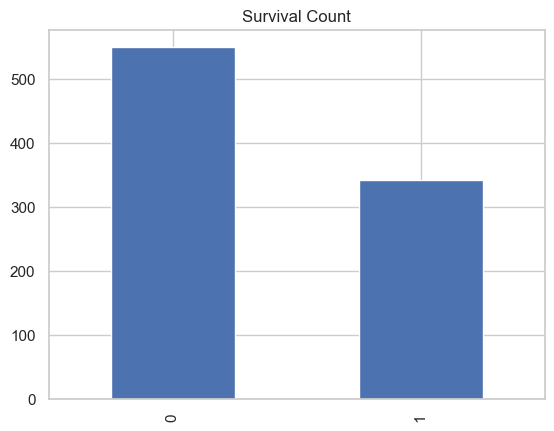

In [26]:
df['Survived'].value_counts().plot(kind='bar', title='Survival Count')

#Observation:

#The number of passengers who did not survive is higher than those who did. This indicates a survival rate of approximately 38%.


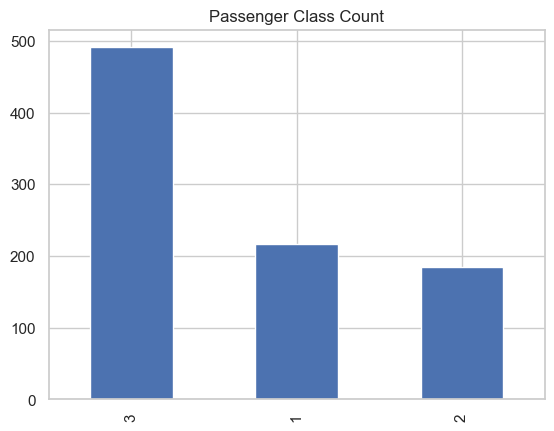

In [27]:
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Count')

#Observation:

#Most passengers were in 3rd class, followed by 1st and 2nd class. This suggests that the Titanic carried more economy-class passengers.


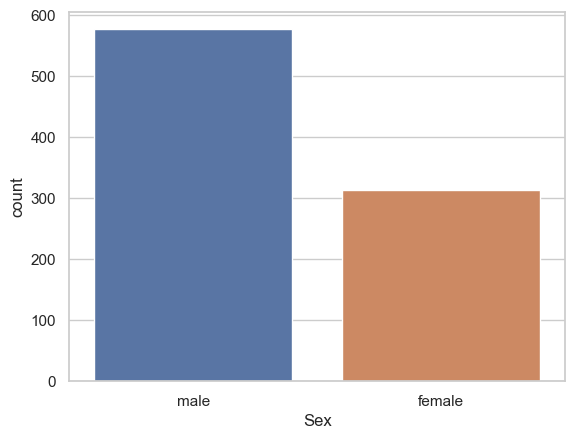

In [28]:
sns.countplot(data=df, x='Sex')

#Observation:

#There were more male passengers than female passengers on board.


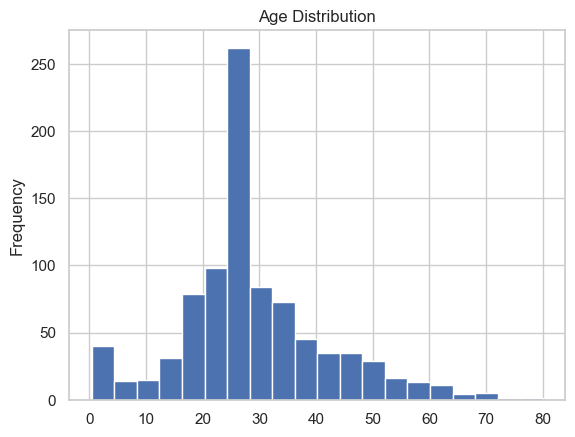

In [24]:
df['Age'].plot(kind='hist', bins=20, title='Age Distribution')

#Observation:

#The age distribution is right-skewed. Most passengers were between 20 and 40 years old. There were few infants and elderly passengers.


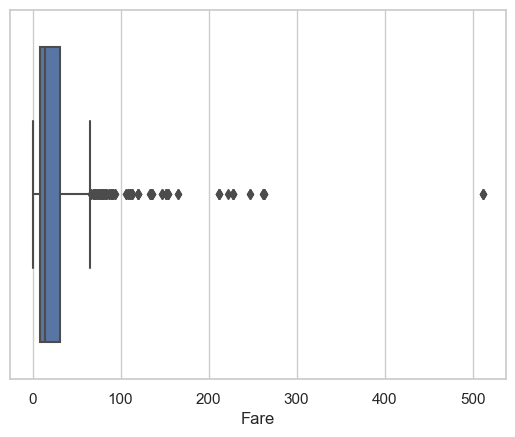

In [25]:
sns.boxplot(x='Fare', data=df)

#Observation:

#The fare distribution shows a lot of outliers. Most fares are below 100, but some go beyond 500, indicating premium-class passengers.


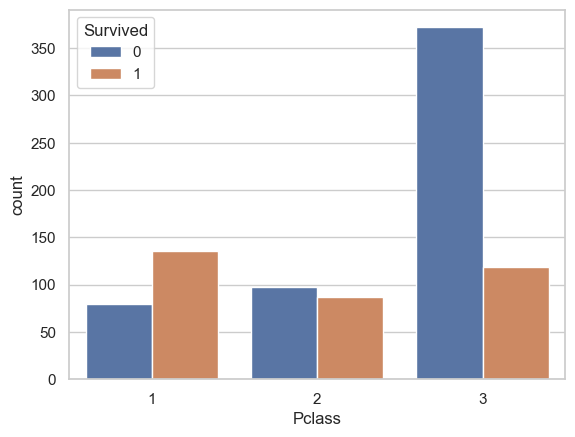

In [21]:
sns.countplot(data=df, x='Pclass', hue='Survived')

#Observation:

#Passengers in 1st class had the highest survival rate. Most passengers in 3rd class did not survive.


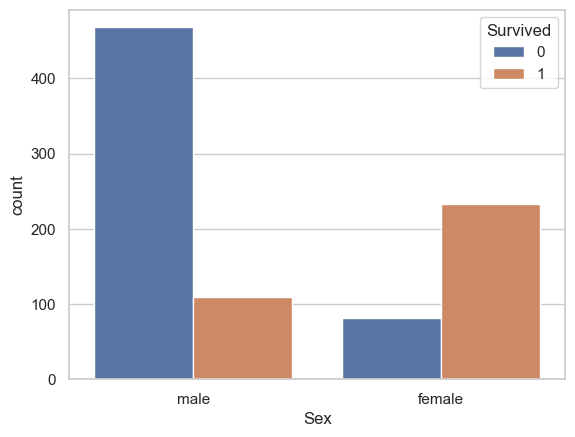

In [22]:
sns.countplot(data=df, x='Sex', hue='Survived')

#Observation:

#Female passengers had a significantly higher survival rate compared to males. "Women and children first" policy seems evident.


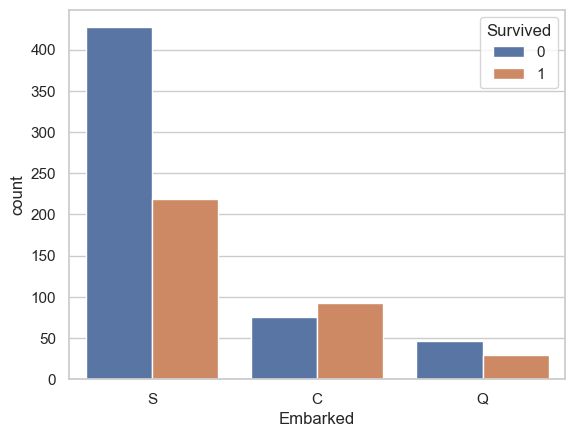

In [23]:
sns.countplot(data=df, x='Embarked', hue='Survived')

#Observation:

#Passengers who embarked from Cherbourg (C) had higher survival rates, possibly indicating more first-class travelers from that port.


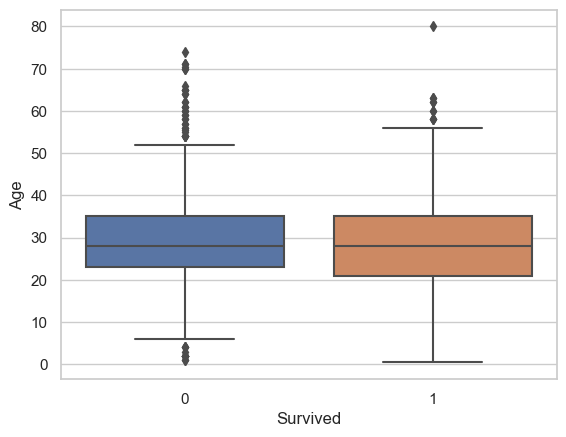

In [19]:
sns.boxplot(x='Survived', y='Age', data=df)

#Observation:

#Survivors had a slightly lower average age. Many children and young adults survived compared to older passengers.

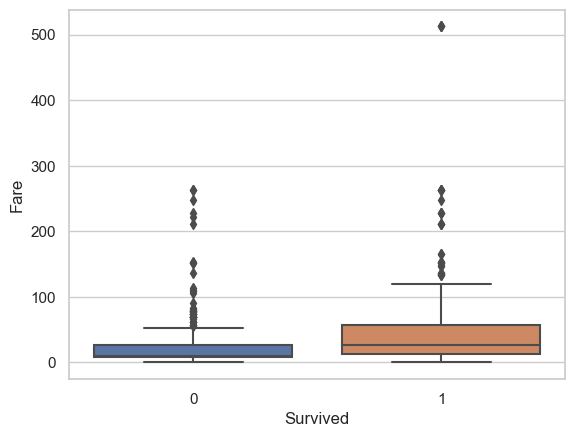

In [20]:
sns.boxplot(x='Survived', y='Fare', data=df)

#Observation:

#Survivors generally paid higher fares, again pointing to the advantage of first-class accommodations in survival likelihood.


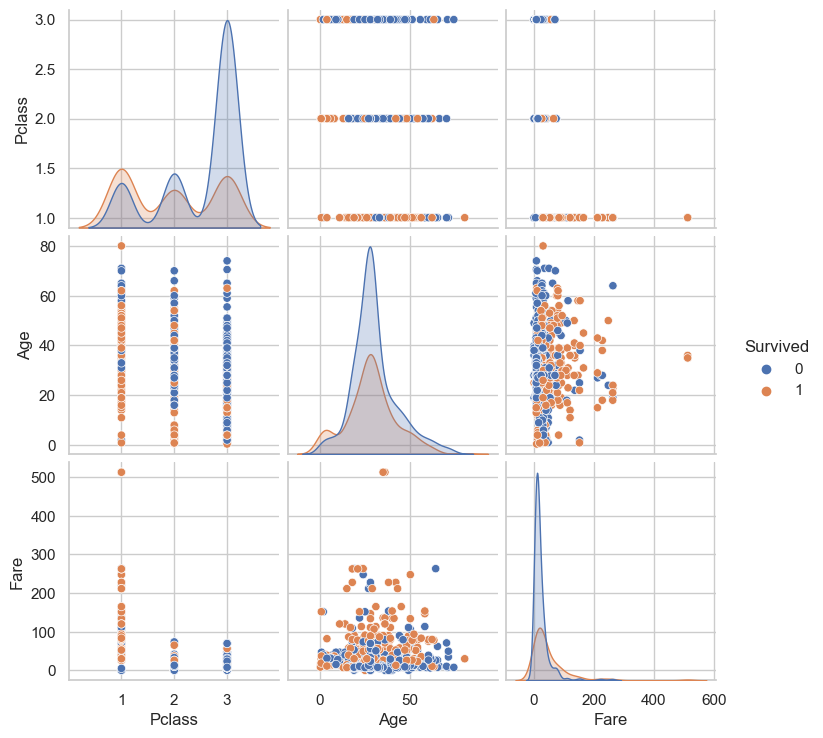

In [16]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')

#Observation:

#Clear separation between higher fares and survival status. Pclass and Fare show strong patterns in survivor distribution.



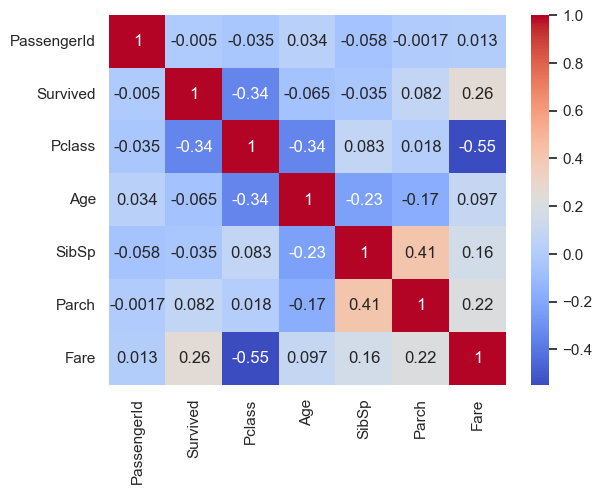

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#Observation:

#The most positively correlated variable with survival is Fare (0.26), while Pclass has a moderate negative correlation (-0.34) with survival. Age shows weak correlation.


In [14]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
#Summary:
#Most survivors were women and passengers from Pclass 1.

#Higher fare was associated with better survival chances.

#Sex, Pclass, and Fare are key predictors of survival.

#Age has a slight influence; children had better chances.

#Missing values in Age, Cabin, and Embarked must be addressed.